# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Data Cleaning

#### Student name: Muhammad Ali Syed

#### Student number: s3640387

## 1 Import libraries 

In [1]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
import numpy as np
import pandas as pd

# Library forn saving a python object to file
import joblib 

# Libraries for further processing of the data
from sklearn.impute import SimpleImputer       # for assigning missing values

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots

# 2 Load data

In [2]:
# Load the data - assuming its stored on your computer
passengerSatisfaction_df = pd.read_csv("passenger-satisfaction.csv") # the suffix _df stands for dataframe

# If you suspect missing values are coded in non-standard ways
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-'] # you can add more in the list
passengerSatisfaction_df = pd.read_csv("passenger-satisfaction.csv", na_values=missing_values)
# 
# If delimiter is not a comma
passengerSatisfaction_df = pd.read_csv("passenger-satisfaction.csv", delimiter=',')

In [3]:
# By default, head() will display 5 rows
# passengerSatisfaction_df.head()
# If you want to see more rows, pass the number as a parameter to the function
passengerSatisfaction_df.head(10)

# Note: You can also use Excel to view the CSV file

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,0
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,0
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,1
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,65725,Male,Disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,0


# 3 Fix data types (if required) 

In [4]:
passengerSatisfaction_df.dtypes

id                                     int64
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
inflight_wifi_service                  int64
convenient_departure_arrival_time      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay(mins)                  int64
arrival_de

# Handle Missing Values 

In [5]:
# Count of missing values in the whole dataframe by column
#diabetes_df.isnull().count() # does not work - gives the count of non-null values
#diabetes_df.isna().sum() # isna() is the same as isnull()

passengerSatisfaction_df.isnull().sum()

id                                     0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
convenient_departure_arrival_time      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay(mins)                  0
arrival_delay(mins)                  310
satisfaction                           0
dtype: int64

In [6]:
# Display percentage of missing values (NaN) per column
# isna() - returns a dataframe of all boolean values True/False
# Each value is tested  whether it's missing or not
# Boolean values are treated as numeric 0/1 when doing arithmetic operations
# So we can calculate the sum and mean of a column of boolean value
# Instead of calculating the sum and dividing by the number of rows, we can use the mean directly

percent_missing = round(passengerSatisfaction_df.isna().mean() * 100, 4)
print(percent_missing)

id                                   0.0000
gender                               0.0000
customer_type                        0.0000
age                                  0.0000
type_of_travel                       0.0000
class                                0.0000
flight_distance                      0.0000
inflight_wifi_service                0.0000
convenient_departure_arrival_time    0.0000
ease_of_online_booking               0.0000
gate_location                        0.0000
food_and_drink                       0.0000
online_boarding                      0.0000
seat_comfort                         0.0000
inflight_entertainment               0.0000
onboard_service                      0.0000
leg_room_service                     0.0000
baggage_handling                     0.0000
checkin_service                      0.0000
inflight_service                     0.0000
cleanliness                          0.0000
departure_delay(mins)                0.0000
arrival_delay(mins)             

# What if missing values are not encoded as NaN? 

In [7]:
# There are lots of zero values in some of the columns
passengerSatisfaction_df[(passengerSatisfaction_df['satisfaction'] == 0)]

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,0
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,4,3,4,2,4,2,0,0.0,0
103899,94171,Female,Disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,0
103901,68825,Male,Disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,54173,Female,Disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,0


In [8]:
# Replace 0s in all columns

# Write code to get the column names
# Or just specify the names of the columns
columns = ['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'flight_distance', 'satisfaction']
for col in columns:
    #print(col)
    # Can replace one or more things at a time
    passengerSatisfaction_df[col].replace(0, np.nan, inplace=True) # replace a 0 with NaN
    #diabetes_df[col].replace(" ", np.nan, inplace=True) # if some missing values were a space

# Check - the percentages of missing values should show up in each column   
print(round(passengerSatisfaction_df.isna().mean() * 100, 4))

id                                    0.0000
gender                                0.0000
customer_type                         0.0000
age                                   0.0000
type_of_travel                        0.0000
class                                 0.0000
flight_distance                       0.0000
inflight_wifi_service                 0.0000
convenient_departure_arrival_time     0.0000
ease_of_online_booking                0.0000
gate_location                         0.0000
food_and_drink                        0.0000
online_boarding                       0.0000
seat_comfort                          0.0000
inflight_entertainment                0.0000
onboard_service                       0.0000
leg_room_service                      0.0000
baggage_handling                      0.0000
checkin_service                       0.0000
inflight_service                      0.0000
cleanliness                           0.0000
departure_delay(mins)                 0.0000
arrival_de

# If you wanted to drop all rows with missing values (NaN) 

In [9]:
# before droping check the number of rows and columns
print(passengerSatisfaction_df.shape)

# Drop the rows where all elements are missing.
passengerSatisfaction_df.dropna(inplace=True)

# It'a a good idea to check the number of rows and columns left after dropping rows
print(passengerSatisfaction_df.shape)

(103904, 24)
(44897, 24)


# Handle outliers 

# Visualise outliers 

<AxesSubplot:xlabel='age'>

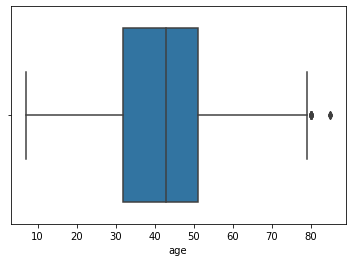

In [10]:
sns.boxplot(x=passengerSatisfaction_df["age"])

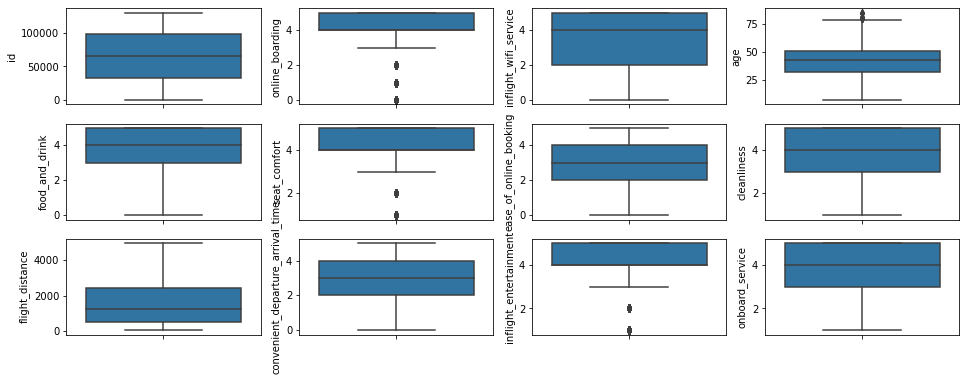

In [11]:
#subpots

fig, ax = plt.subplots(3,4, figsize=(16,6))  # 3 rows and 4 columns

# Row 0
ax1 = sns.boxplot(y=passengerSatisfaction_df["id"], ax=ax[0,0]) # row 0, col 0
ax2 = sns.boxplot(y=passengerSatisfaction_df["online_boarding"], ax=ax[0,1]) 
ax3 = sns.boxplot(y=passengerSatisfaction_df["inflight_wifi_service"], ax=ax[0,2])
ax4 = sns.boxplot(y=passengerSatisfaction_df["age"], ax=ax[0,3])

# Row 1
ax5 = sns.boxplot(y=passengerSatisfaction_df["food_and_drink"], ax=ax[1,0])
ax6 = sns.boxplot(y=passengerSatisfaction_df["seat_comfort"], ax=ax[1,1])
ax7 = sns.boxplot(y=passengerSatisfaction_df["ease_of_online_booking"], ax=ax[1,2])
ax8 = sns.boxplot(y=passengerSatisfaction_df["cleanliness"], ax=ax[1,3])

# Row 2
ax9 = sns.boxplot(y=passengerSatisfaction_df["flight_distance"], ax=ax[2,0])
ax10 = sns.boxplot(y=passengerSatisfaction_df["convenient_departure_arrival_time"], ax=ax[2,1])
ax11 = sns.boxplot(y=passengerSatisfaction_df["inflight_entertainment"], ax=ax[2,2])
ax12 = sns.boxplot(y=passengerSatisfaction_df["onboard_service"], ax=ax[2,3])


# Percentage of outliers 

In [12]:
# Finding the percentages of outlier per columns
# Note: Outliers only apply to continuous numerical values - not to strings or numerical categories!
# So, be careful what you include in the list of column names

columns = ['id', 'online_boarding', 'inflight_wifi_service', 'age', 'food_and_drink', 'seat_comfort', 'ease_of_online_booking',
           'cleanliness','flight_distance','convenient_departure_arrival_time','inflight_entertainment','onboard_service']
print(columns)
print()

for col in columns:
    percentile_25 = passengerSatisfaction_df[col].quantile(0.25)
    percentile_75 = passengerSatisfaction_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    total = len(passengerSatisfaction_df[col])
    #total = diabetes_df[col].shape[0] # also works

    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper}")

    # Count all values that are less than the lower boundary OR those that are greater than the upper boundary
    #num_outliers = diabetes_df[(diabetes_df[col] < lower) | (diabetes_df[col] > upper)].count() # returns a list of things
    num_outliers = len(passengerSatisfaction_df[(passengerSatisfaction_df[col] < lower) | (passengerSatisfaction_df[col] > upper)])
    
    pc_outliers = round(num_outliers*100/total,2)
    
    print(f"Num outliers: {num_outliers}, total rows: {total}, percent: {pc_outliers}")
    print()

['id', 'online_boarding', 'inflight_wifi_service', 'age', 'food_and_drink', 'seat_comfort', 'ease_of_online_booking', 'cleanliness', 'flight_distance', 'convenient_departure_arrival_time', 'inflight_entertainment', 'onboard_service']

col: id, lower: -63030.0, upper: 194114.0
Num outliers: 0, total rows: 44897, percent: 0.0

col: online_boarding, lower: 2.5, upper: 6.5
Num outliers: 4830, total rows: 44897, percent: 10.76

col: inflight_wifi_service, lower: -2.5, upper: 9.5
Num outliers: 0, total rows: 44897, percent: 0.0

col: age, lower: 3.5, upper: 79.5
Num outliers: 18, total rows: 44897, percent: 0.04

col: food_and_drink, lower: 0.0, upper: 8.0
Num outliers: 0, total rows: 44897, percent: 0.0

col: seat_comfort, lower: 2.5, upper: 6.5
Num outliers: 6020, total rows: 44897, percent: 13.41

col: ease_of_online_booking, lower: -1.0, upper: 7.0
Num outliers: 0, total rows: 44897, percent: 0.0

col: cleanliness, lower: 0.0, upper: 8.0
Num outliers: 0, total rows: 44897, percent: 0.0



# Replace outliers with median 

In [13]:
# Using Inter Quartile Range (IQR) to detect outliers - for non-normal (non-Gaussian) distributions

columns = ['id', 'online_boarding', 'inflight_wifi_service', 'age', 'food_and_drink', 'seat_comfort', 'ease_of_online_booking',
           'cleanliness','flight_distance','convenient_departure_arrival_time','inflight_entertainment','onboard_service']

for col in columns:
    median_val = passengerSatisfaction_df[col].quantile(0.50)
    percentile_25 = passengerSatisfaction_df[col].quantile(0.25)
    percentile_75 = passengerSatisfaction_df[col].quantile(0.75)
    iqr = percentile_75 - percentile_25 # Inter Quartile Range
    
    # Determine the upper and lower boundaries for outliers
    # The lower and upper boundaries are less than the bottom whisker or greater than the top whisker
    #cut_off = iqr * 3    # three times IQR - for detecting extreme outliers
    cut_off = iqr * 1.5  # normally use 1.5 times IQR
    lower, upper = percentile_25 - cut_off, percentile_75 + cut_off
    print(f"col: {col}, lower: {lower}, upper: {upper},  median_val: {median_val}")
    
    # Replace all outliers in column with median value
    # Replace all values that are less than the lower boundary OR those that are greater than the upper boundary
    passengerSatisfaction_df[col] = np.where((passengerSatisfaction_df[col] < lower) | (passengerSatisfaction_df[col] > upper), median_val, passengerSatisfaction_df[col])
passengerSatisfaction_df.describe().T  # T means transpose - will transpose rows to column

col: id, lower: -63030.0, upper: 194114.0,  median_val: 65888.0
col: online_boarding, lower: 2.5, upper: 6.5,  median_val: 4.0
col: inflight_wifi_service, lower: -2.5, upper: 9.5,  median_val: 4.0
col: age, lower: 3.5, upper: 79.5,  median_val: 43.0
col: food_and_drink, lower: 0.0, upper: 8.0,  median_val: 4.0
col: seat_comfort, lower: 2.5, upper: 6.5,  median_val: 4.0
col: ease_of_online_booking, lower: -1.0, upper: 7.0,  median_val: 3.0
col: cleanliness, lower: 0.0, upper: 8.0,  median_val: 4.0
col: flight_distance, lower: -2292.5, upper: 5223.5,  median_val: 1250.0
col: convenient_departure_arrival_time, lower: -1.0, upper: 7.0,  median_val: 3.0
col: inflight_entertainment, lower: 2.5, upper: 6.5,  median_val: 4.0
col: onboard_service, lower: 0.0, upper: 8.0,  median_val: 4.0


,count,mean,std,min,25%,50%,75%,max
id,44897.0,65528.397866,37347.762898,2.0,33399.0,65888.0,97685.0,129879.0
age,44897.0,41.733390,12.741118,7.0,32.0,43.0,51.0,79.0
flight_distance,44897.0,1530.180302,1128.321401,31.0,526.0,1250.0,2405.0,4983.0
inflight_wifi_service,44897.0,3.161191,1.588731,0.0,2.0,4.0,5.0,5.0
convenient_departure_arrival_time,44897.0,2.969887,1.552317,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,44897.0,3.031316,1.575395,0.0,2.0,3.0,4.0,5.0
gate_location,44897.0,2.977682,1.374288,0.0,2.0,3.0,4.0,5.0
food_and_drink,44897.0,3.520814,1.236120,0.0,3.0,4.0,5.0,5.0
online_boarding,44897.0,4.335212,0.595351,3.0,4.0,4.0,5.0,5.0
seat_comfort,44897.0,4.294318,0.619189,3.0,4.0,4.0,5.0,5.0
